# INTRODUCTION

**PROBLEM STATEMENT**

There is a need within the apple industry to be able to accurately predict how to set the price per kilogram of golden delicious apples.

**INTRODUCTION/CONTEXT**

The apple industry, like many other fresh produce sectors, faces a delicate balance bewteen supply and demand and how to set their prices accordingly. If prices are set too low, profit will fall, whilst if prices are set to high, then there is the risk of apple sales not being high enough. The knock on effect of poor sales is that a large volume of stock goes to waste.

We have access to dataset containing multiple numerical and categorical features. Using these variables, we are going to train a supervised regression model which will aim to accurately predict the price of golden delicious apples per kilogram, given a set of features.

**SUPERVISED LEARNING AS A** **PROBLEM** **SOLVING** **TOOL**

We will be building a regression model, through supervised learning, in order to accurately predict the recommended average price per kilogram of golden declious apples in the coming years. The average price/ target variable will be shifted depending on the value(s) of a select number of numerical and categorical features.

While no model can accurately preidct every outcome with on hundred percent certainty, a well trained and a well evaluated model can provide appropriate estimations of the target variable. 

**INTERPLAY BETWEEN HUMAN EXPERTISE AND REGRESSION MODEL**

No regression model, no matter how complex or accurate, should serve as the absolute decision maker when deciding on business strategy. Well trained machine learning models can definitely provide valuable insights into the interactions of key variables but they cannot replace industry expertise.

For example, the regression model below may give insight into how a categorical variable may affect the average price of apples but experienced farmers, retailers and distributors in the apple industry receive this information and choose to not implement the recommended price shifting due to their own expertise in the field. 

Furthermore, apple farmers could be consulted in order to identify more potential dependent variables that could potentially play a key role in affecting the target variable. This would also involve having access to the right, clean and pre-processed data.

# PACKAGES

IMPORTING PACKAGES FOR EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np   # must we include a comment for the packages?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

MORE PACKAGES WILL BE IMPORTED FOR THE REGRESSION MODEL(S)

# DATA IMPORT AND INSPECTION

In [2]:
dftrain = pd.read_csv('df-train_set.csv')
dftest = pd.read_csv('df-test_set.csv')

Before analysing the data, it is imperative to examine the dataset for any notable anomalies. 
We begin by assesing the shape (number of rows and columns) of the dataframe, as well as data type of each column. It is also useful to call the .head() on the dataframe in order to glance at the first five rows.

In [3]:
dftrain.shape

(64376, 13)

The dataframe contains 64376 rows and 13 columns. One of these columns is the target variable - average price of a kilogram of apples - and thus there are 12 feature variables.

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Here we can see that we contain both numerical and categorical feature variables. Numerical and feature variables will get subjected to different Exploratory Data Analysis techniques.

The categorical feature columns are 

```
Province, Container, Size_Grade and Commodities.

```
Meanwhile, the numerical feature columns are 

```
Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg, 
```
Furthermore, the column 

```
Date
```
can be a useful feature in order to track the interplay of other features interacting over time.






In [5]:
dftrain.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [6]:
dftest.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


Lastly, we want to check as to whether there is any missing/null data entries


In [7]:
dftrain.isnull().sum() # allows us to view the number of missing data values per column()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

From the test set we can see that the Commodities only contain the APPLE GOLDEN DELICIOUS. Therefore we can subset the training data to follow the same suit.

In [8]:
golden_apple_train = dftrain[dftrain.Commodities == 'APPLE GOLDEN DELICIOUS']
golden_apple_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


# DATA TRANSFORMATION

Currently, the data in the Date column is in string format. It is conventional then, to convert this data to datetime format. Furthermore, it may prove usefl to aggregate this datetime data into quarterly and monthly data. This can be achieved by creating new columns for these attributes.

In [9]:
golden_apple_train.date = pd.to_datetime(golden_apple_train.Date) # Converts the data to datetime format
golden_apple_train["Quarter"] = golden_apple_train.date.dt.quarter # Creates a new columns with quarter data values
golden_apple_train["Month"] = golden_apple_train.date.dt.month # Creates a new column with month data values
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9


We wish to also be able to assess whether the season when which the observation was made has any bearing on the avg_price_per_kg. In order to to this, we create a function, season(), which uses the transformed date valus to assign each month to its respective season.

In [10]:
def season(df):
  season = []

  for month in df['Month']:
     if 3 <= month <= 5:
       season.append('Autumn')

     if 6 <= month <= 8:
       season.append('Winter')

     if 9 <= month <= 11:
       season.append('Spring')

     if month == 1:
       season.append('Summer')

     if month == 2:
       season.append('Summer')

     if month == 12:
       season.append('Summer')

  

  df['Season'] = season

  return df


In [11]:
golden_apple_train =  season(golden_apple_train) # applying the function to our dataset.
golden_apple_train.head(5)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,Spring


The above data transformations can be applied to the test dataset as well. First, though, change the name of the test dataset to a variable named 'golden_apple_test'.

In [12]:
golden_apple_test = dftest
golden_apple_test.Date = pd.to_datetime(golden_apple_test['Date'])
golden_apple_test["Quarter"] = golden_apple_test.Date.dt.quarter 
golden_apple_test["Month"] = golden_apple_test.Date.dt.month 
golden_apple_test = season(golden_apple_test)
golden_apple_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,3,7,Winter
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2,1,1,Summer
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45,3,8,Winter
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8,2,5,Autumn
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19,2,5,Autumn


**TARGET** **VARIABLE** **IDENTIFICATION**

The target variable is the average price of the golden delicious apples.

# EXPLORATORY DATA ANALYSIS


Exploratory Data Analysis (EDA) is a vitally important step in the Data Science Process. EDA consists of comprehensively examining the dataset before using the the dataset in training a model. The core of EDA involves identifying key relationships that exist between featires in the dataset and how these features interact to alter the target variable.
EDA includes perfroming univariate and multivariate analysis using a myriad of statistical and data visualisating techniques.




## UNIVARIATE ANALYSIS - NUMERICAL FEATURES

Univariate EDA entails assesing each variable individually (both in a graphical and non-graphical sense). Non-graphically univariate EDA methods include exploring the spread of the numerical features.

By calling 

```
df.describe()

```
we are given a comprehensive breakdown of several key summary statistics of each numerical feature.



In [13]:
golden_apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,2.239754,5.609119
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,0.908357,2.687248
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,1.000000,3.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,2.000000,6.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,3.000000,7.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,4.000000,12.000000


The 25%, 50% and 75% metrics relate to the 25th, median and 75th percentiles respectively. It is important to not directly compare the means ( and other summary metrics) between different variables. At least not performing any standardisation first. 

Additionally, there are two further metrics that can be calculated. 

```
df.skew()
```
allows one to assess whether a numerical feature is skewed either to the left or right (i.e not normally distributed/symetrical about the median). Whilst

```
df.curtosis()
```
allows one to evaluate whether or not there is a high prevelance of outliers present in each of the numerical features.




In [14]:
golden_apple_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Quarter            -0.112794
Month               0.078651
dtype: float64

Here we can see that each numerical feature has a skew value of greater than 1. Thus each variable can be deemed to be significantly postively skewed to the right.

In [15]:
golden_apple_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Quarter             -1.175297
Month               -0.620111
dtype: float64

It can be assumed, based on the above skewness and kurtosis numbers that these numerical features have a high prevelance of outliers. However, further analysis ina graphical form is required.



GRAPHICAL UNIVARIATE ANALYSIS - HISTORGRAM

In order to view each numerical feature in a seperate graph but without having to write code for each seperate numerical feature, we create a list containing the names of all of the relevant numerical columns.

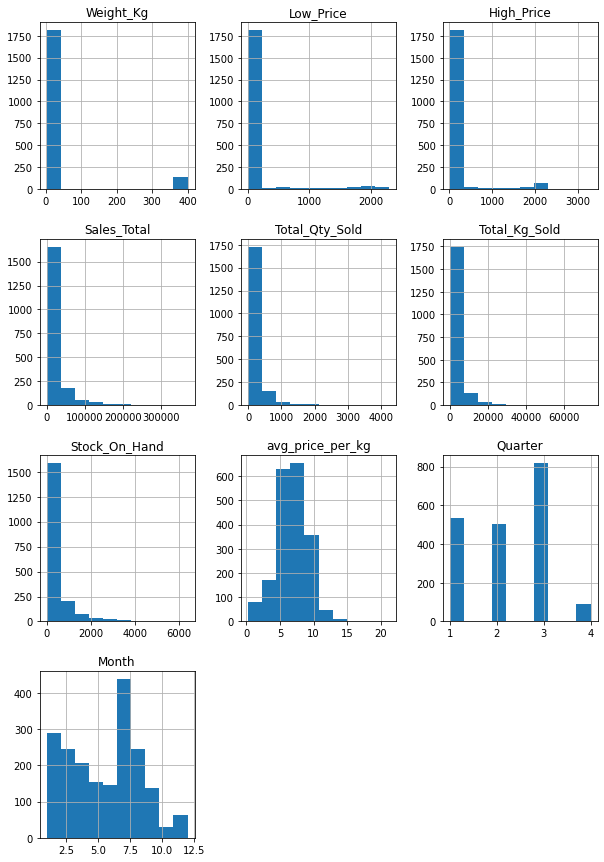

In [17]:
num_features = ['Weight_Kg', 
                'Low_Price', 
                'High_Price', 
                'Sales_Total', 
                'Total_Qty_Sold', 
                'Total_Kg_Sold', 
                'Stock_On_Hand', 
                'avg_price_per_kg', 
                'Quarter', 
                'Month']

golden_apple_train[num_features].hist(figsize=(10,15), sharex=False)
plt.show()

Addtionally, we can create distribution plots to accompany the above histograms for the numerical features.

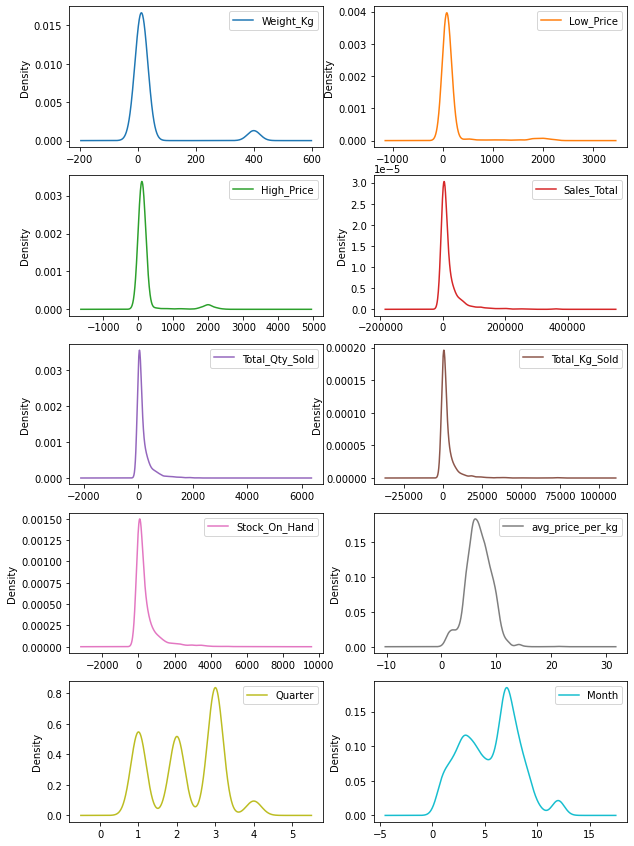

In [18]:
golden_apple_train[num_features].plot(kind='density', subplots=True, layout=(5,2), sharex=False, figsize=(10,15)) # Creates the distribtuion plots, using matplotplib.pyplot, for each numerical feature
plt.show()

## UNIVARIATE ANALYSIS - CATEGORICAL ANALYSIS

COUNTPLOT

A common EDA method for categorical features is to create countplots and bar charts, generally dpeending on the specific data type of the feature in question.

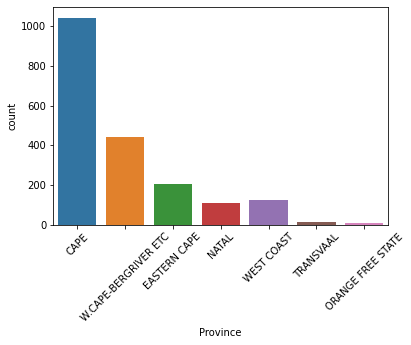

In [19]:
sns.countplot(x='Province', data=golden_apple_train) # Creates a count of the no. of observations located in each province.
plt.xticks(rotation=45) # Rotates the labels on x-axis to make them more reader-friendly.
plt.show()

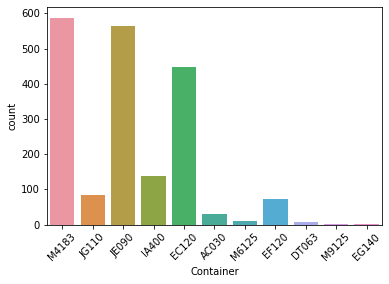

In [20]:
sns.countplot(x='Container', data=golden_apple_train) # Creates a countplot of the no. of observations using the various container types
plt.xticks(rotation=45)
plt.show()

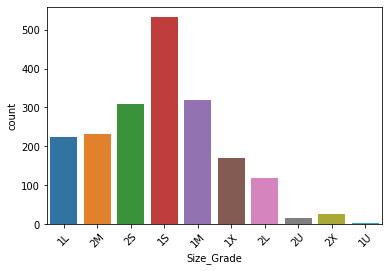

In [21]:
sns.countplot(x='Size_Grade', data=golden_apple_train) # Creates a countplot of the no. of observations corresponding to each size grade
plt.xticks(rotation=45)
plt.show()

## MULTIVARIATE ANALYSIS

Multivariate EDA entails exploring and assessing any potential relationships between features. 

**Non-graphical multivariate** analysis involves finding the correlation coefficients between all relevant numerical features.

The Pearson's correlation coeffiecient is a common correlation metric used to make an inital assessment of the relationship between two numerical variables in a dataset.

In [22]:
golden_apple_train.corr() # This will return a matrix of Pearson Correlation Coefficients between all numerical feature.


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.042958,0.047613
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,0.024559,0.039084
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.039385,0.047717
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.040985,-0.055853
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.037732,-0.058639
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.005622,-0.023098
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.027354,-0.011749
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.022305,0.005205
Quarter,0.042958,0.024559,0.039385,-0.040985,-0.037732,-0.005622,-0.027354,-0.022305,1.000000,0.952036
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.952036,1.000000


GRAPHICAL MUTIVARIATE ANALYSIS - HEATMAP

A convential way to begin **graphical multivariate** analysis is to construct a heatmap displaying the Pearson Ciorrelation Coefficient between **numerical features**

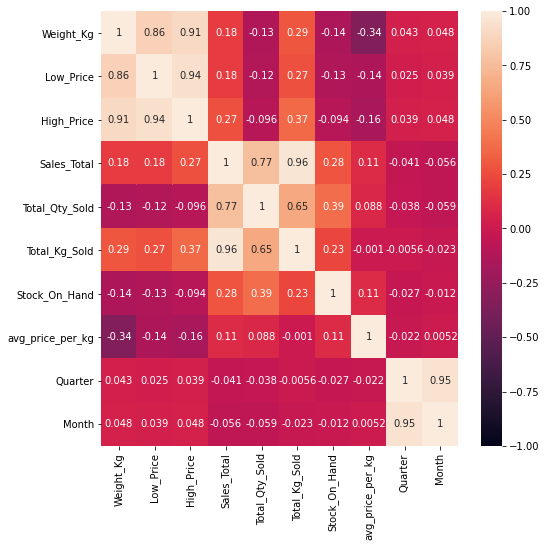

In [23]:
f, ax = plt.subplots(figsize=(8, 8)) # This increases the size of the Seaborn Heatmap.
sns.heatmap(golden_apple_train.corr(), vmin=-1, vmax=1, annot=True) # Creates a Heatmap using seaborn
plt.show() 

PAIRPLOT

Seaborn provides suers with a myriad of visualisations. One such being the Pairplot. This produces a matrix wbhich containing a scatterplot for every possible combination of numerical features in the dataset.

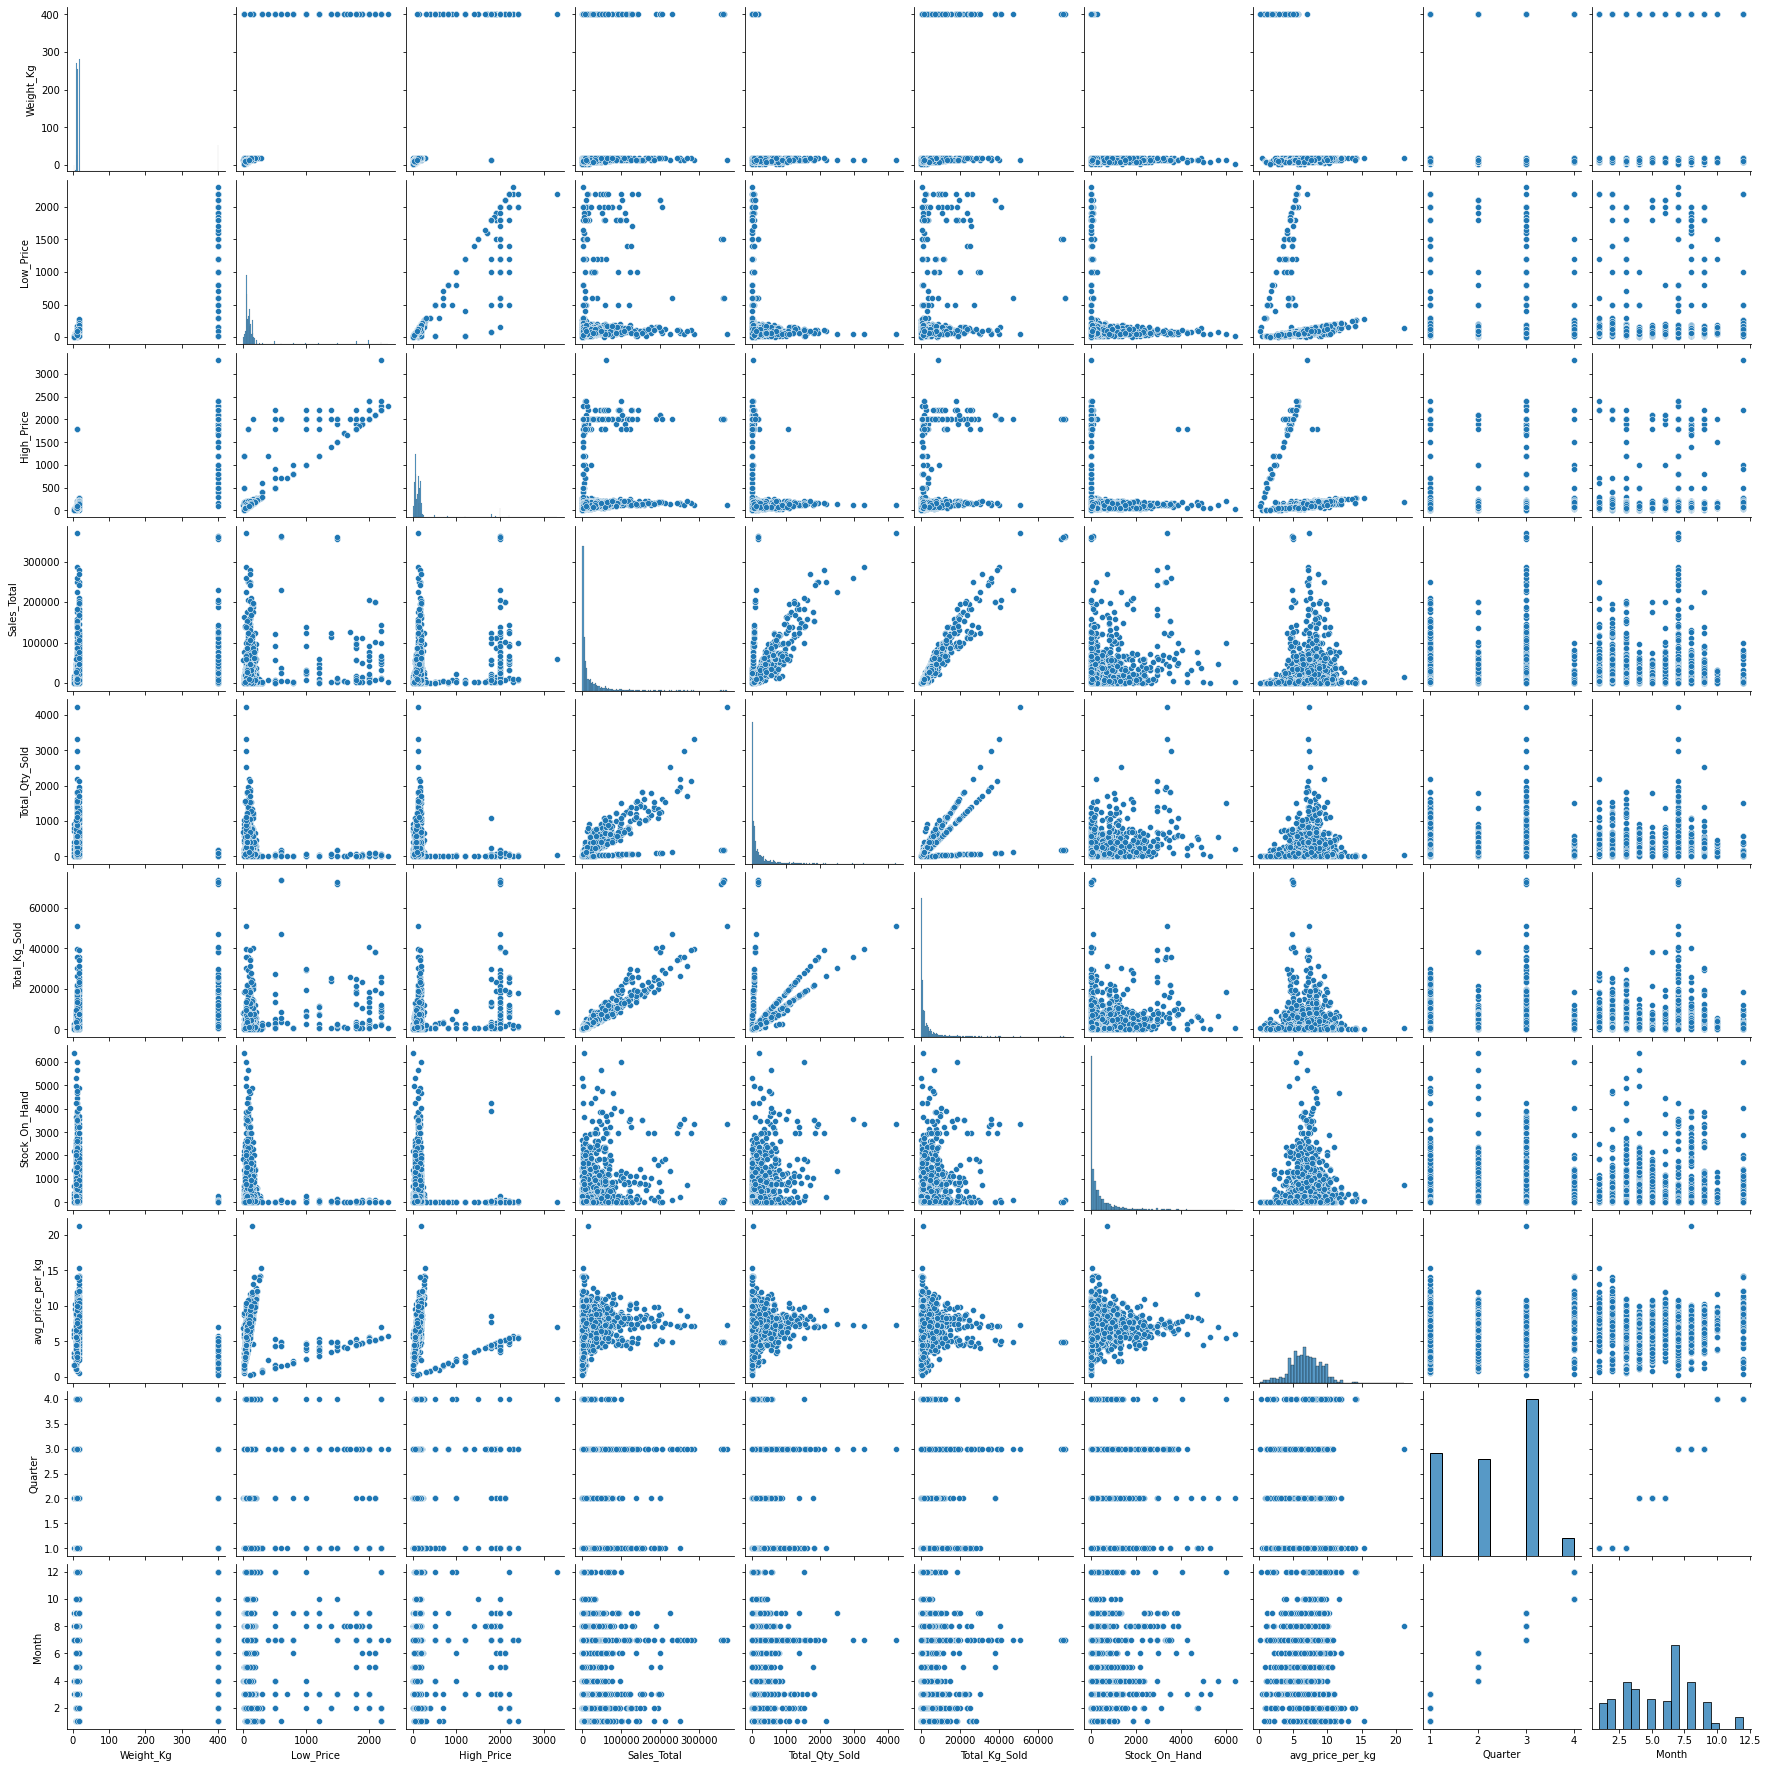

In [24]:
sns.pairplot(golden_apple_train) # Creates a Pairplot using Seaborn
plt.show()

While there are many scatterplots in the above pairplot matrix, very few plots seems to be showing potential linear relationships between variables. For example, Sales_Total and Total_Kg_Sold appear to have a reasobaly sound positive linear relationship. However, even in the this scatterplot, there are a couple of deviating lines towards the top right corner. Additionally, one would expect Sales_Total and Total_Kg_sold to be positvely correlated regardless of what the target variable is.

It looks as though the target variable, avg_price_per_kg, may have a linear relationship with both Quarter and Month which could be explored further

SCATTERPLOT 

The Scatterplot function function is great for assessing whether there is likely to be any linear relationship between two variable. Conveneintly, the sns.scatterplot() fucntion has a hue arguemnt which allows the adsition of a third variable. The variable chosen often tends to be a categorical feature. Thus we can visualise the potential interplay of two numerical features with a third categorical feature. 

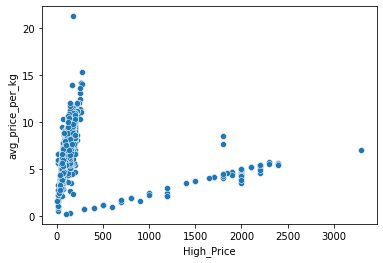

In [ ]:
sns.scatterplot(x='Low_Price', y='High_Price', hue='Size_Grade' data=golden_apple_train) # Creates a Scatterplot using Seaborn
plt.show()

Unfortunately, we cannot read too much into this scatterplot as the relationship is not linear. Unless, we perfomr data cleaning to remove all High_Price values above 400 units or so.

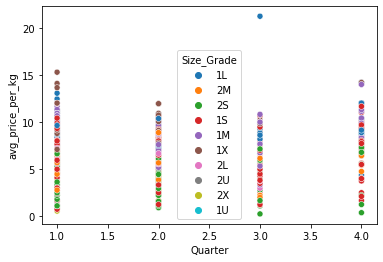

In [ ]:
sns.scatterplot(x='Quarter', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.show()

This Scatterplot allows us to visualise that there is perhaps a positive quadratic relationship between Quarter ( an indication of the time of year) and the target variable.

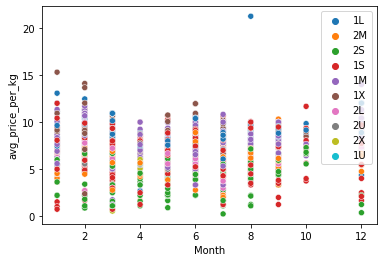

In [ ]:
sns.scatterplot(x='Month', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.legend(loc='best')
plt.show()

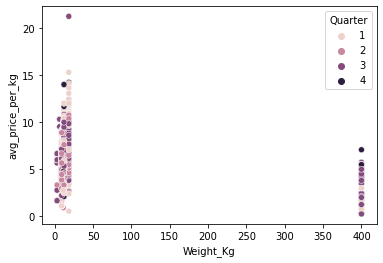

In [ ]:
sns.scatterplot(x='Weight_Kg', y='avg_price_per_kg', hue='Quarter', data=golden_apple_train)
plt.show()

Due to the heavy contingent of outliers at 400 kg, it is very difficult to know if there could be a linear relationship between these two variables.

**INSIGHT ON THE EDA**

With the data in this current form, it is very difficult to pin down potential linear relationships to explore further. Thus it makes sleecting key predictor variables in roder to construct a linear model very challenging. There are definitely predictor variables within this given dataset, they just need to be . This is without any further data cleaning or feature engineering.

Thus, we will attempt to create dummy variables in order to trunt he categorical data into numeric data. This means that the Container values will carry a specific integer based on their container type name.



**DATA CLEANING/DEALING WITH OUTLIERS**

# DATA CLEANING/DEALING WITH OUTLIERS

**FEATURE SELECTION AND ENGINEERING**

# FEATURE SELECTION AND ENGINEERING

# REGRESSION MODEL

**MODEL IMPORT AND INSTANTIATION**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

**MODEL TRAINING**

In [ ]:
X = golden_apple_train['Weight_Kg'][:, np.newaxis]

In [ ]:
lm.fit(golden_apple_train['Weig, golden_apple_train['avg_price_per_kg'])

ValueError: ignored

**MODEL TESTING**

**MODEL PREDICTION**

**MODEL PERFORMANCE EVALUATION**

**FINAL COMMENTS**